In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split

In [81]:
df = pd.read_csv("../data/raw/heart_cleveland_upload.csv")

**ABOUT THE DATASET**

There are 13 attributes

1. __age__: age in years
2. __sex__: sex (1 = male; 0 = female)
3. __cp__: chest pain type
    -- Value 0: typical angina
    -- Value 1: atypical angina
    -- Value 2: non-anginal pain
    -- Value 3: asymptomatic
4. __trestbps__: resting blood pressure (in mm Hg on admission to the hospital)
5. __chol__: serum cholestoral in mg/dl
6. __fbs__: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. __restecg__: resting electrocardiographic results
    -- Value 0: normal
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. __thalach__: maximum heart rate achieved
9. __exang__: exercise induced angina (1 = yes; 0 = no)
10. __oldpeak__ = ST depression induced by exercise relative to rest
11. __slope__: the slope of the peak exercise ST segment
    -- Value 0: upsloping
    -- Value 1: flat
    -- Value 2: downsloping
12. __ca__: number of major vessels (0-3) colored by flourosopy
13. __thal__:
    0 = normal;
    1 = fixed defect;
    2 = reversable defect
    and the label
14. __condition__:
    0 = no disease,
    1 = disease


In [82]:
data = df.copy()

In [83]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [84]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

there are no missing values

In [85]:
# check for duplicate rows
data.duplicated().sum()

0

there are no duplicates

In [86]:
# Renaming columns
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'condition']

<h3>EDA</h3>

In [87]:
pd.options.mode.chained_assignment = None
data['sex'][data['sex'] == 0] = 'Female'
data['sex'][data['sex'] == 1] = 'Male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'Typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'Atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'Non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'Asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'Lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'Greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'Normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'Left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'No'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'Yes'

data['st_slope'][data['st_slope'] == 0] = 'Upsloping'
data['st_slope'][data['st_slope'] == 1] = 'Flat'
data['st_slope'][data['st_slope'] == 2] = 'Downsloping'

data['thalassemia'][data['thalassemia'] == 0] = 'Normal'
data['thalassemia'][data['thalassemia'] == 1] = 'Fixed defect'
data['thalassemia'][data['thalassemia'] == 2] = 'Reversable defect'

data['condition'][data['condition'] == 0] = 'No'
data['condition'][data['condition'] == 1] = 'Yes'

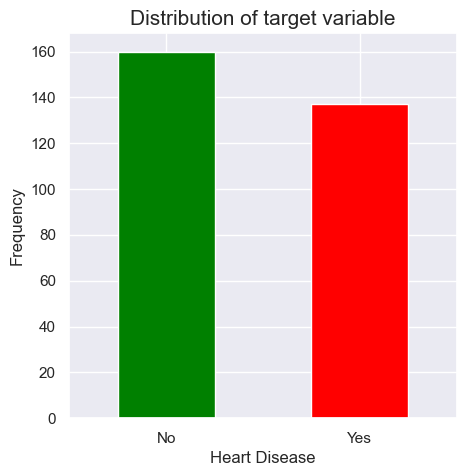

In [88]:
sns.set(style="darkgrid")
data.condition.value_counts().plot(kind="bar",figsize=(5,5),color=['green','red'])
plt.title('Distribution of target variable',fontsize=15)
plt.xlabel('Heart Disease',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(rotation=0)
plt.show()

it's good that there are more healthy. But we have to predict correctly to save someone's life

In [89]:
count_no_disease = len(data[data.condition == "No"])
count_have_disease = len(data[data.condition == "Yes"])

print("Percentage of Patients don't have Heart Disease: {:.2f}%".format((count_no_disease / data.shape[0] * 100)))
print("Percentage of Patients have Heart Disease: {:.2f}%".format((count_have_disease / data.shape[0] * 100)))

Percentage of Patients don't have Heart Disease: 53.87%
Percentage of Patients have Heart Disease: 46.13%


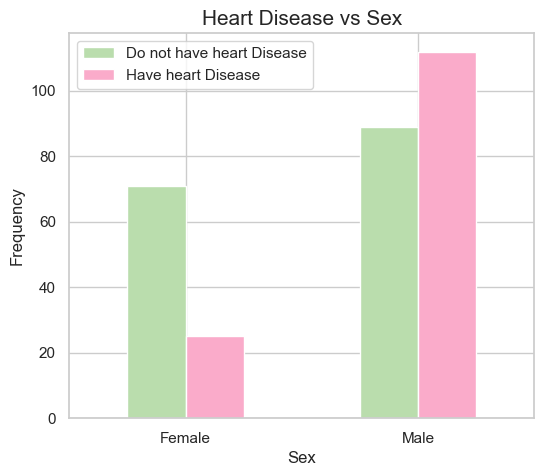

In [90]:
sns.set(style="whitegrid")
pd.crosstab(data.sex,data.condition).plot(kind="bar",figsize=(6,5),color=['#BADDAD',"#FAABCA"])
plt.title('Heart Disease vs Sex',fontsize=15)
plt.xlabel('Sex',fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Do not have heart Disease", "Have heart Disease"])
plt.ylabel('Frequency',fontsize=12)
plt.show()

Men are more prone to heart disease than women :(

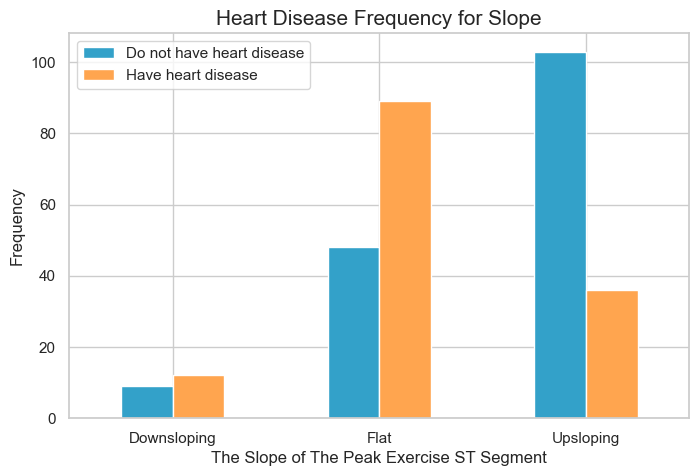

In [91]:
sns.set(style="whitegrid")
pd.crosstab(data.st_slope, data.condition).plot(kind="bar", figsize=(8,5), color=["#33A1C9", "#FFA54F"], ax=plt.gca())
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.title("Heart Disease Frequency for Slope",fontsize=15)
plt.xlabel("The Slope of The Peak Exercise ST Segment",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Downsloping", "Flat", "Upsloping"])
plt.ylabel("Frequency",fontsize=12)
plt.show()

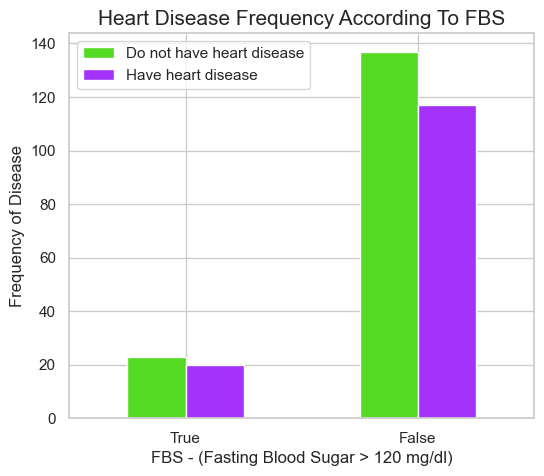

In [92]:
sns.set(style="whitegrid")
pd.crosstab(data.fasting_blood_sugar, data.condition).plot(kind="bar", figsize=(6,5), color=["#54DA23", "#A432FA"], ax=plt.gca())
plt.title("Heart Disease Frequency According To FBS",fontsize=15)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("FBS - (Fasting Blood Sugar > 120 mg/dl)",fontsize=12)
plt.gca().set_xticklabels(labels=["True", "False"])
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease",fontsize=12)
plt.show()

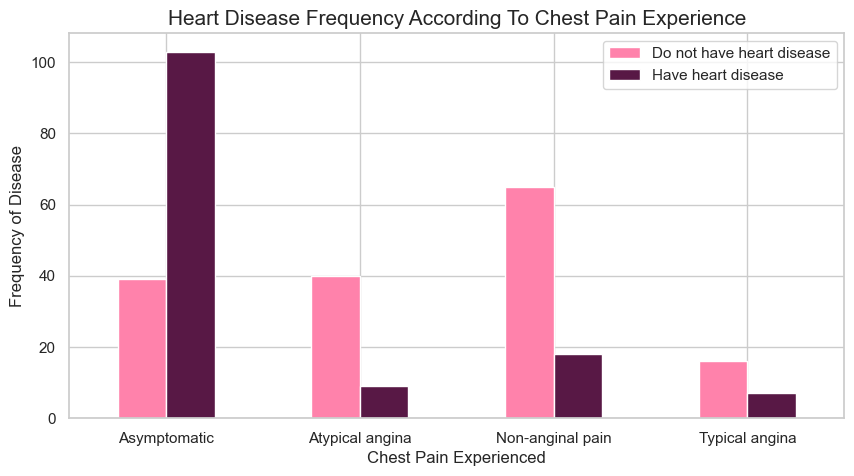

In [93]:
sns.set(style="whitegrid")
pd.crosstab(data.chest_pain_type, data.condition).plot(kind="bar", figsize=(10, 5), color=["#FF82AB", "#581845"], ax=plt.gca())
plt.title("Heart Disease Frequency According To Chest Pain Experience",fontsize=15)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Chest Pain Experienced",fontsize=12)
plt.gca().set_xticklabels(
    labels=["Asymptomatic","Atypical angina","Non-anginal pain","Typical angina"]
)
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease",fontsize=12)
plt.show()

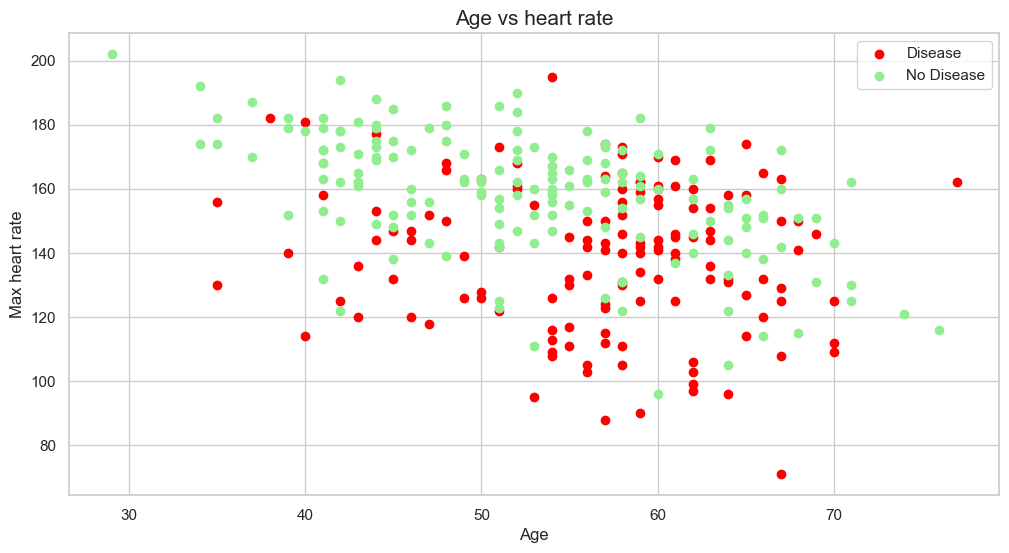

In [94]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

plt.scatter(data.age[data.condition=='Yes'], data.max_heart_rate_achieved[data.condition=='Yes'],color='red')
plt.scatter(data.age[data.condition=='No'], data.max_heart_rate_achieved[data.condition=='No'],color='lightgreen')

plt.title('Age vs heart rate',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Max heart rate',fontsize=12)
plt.legend(['Disease','No Disease'])

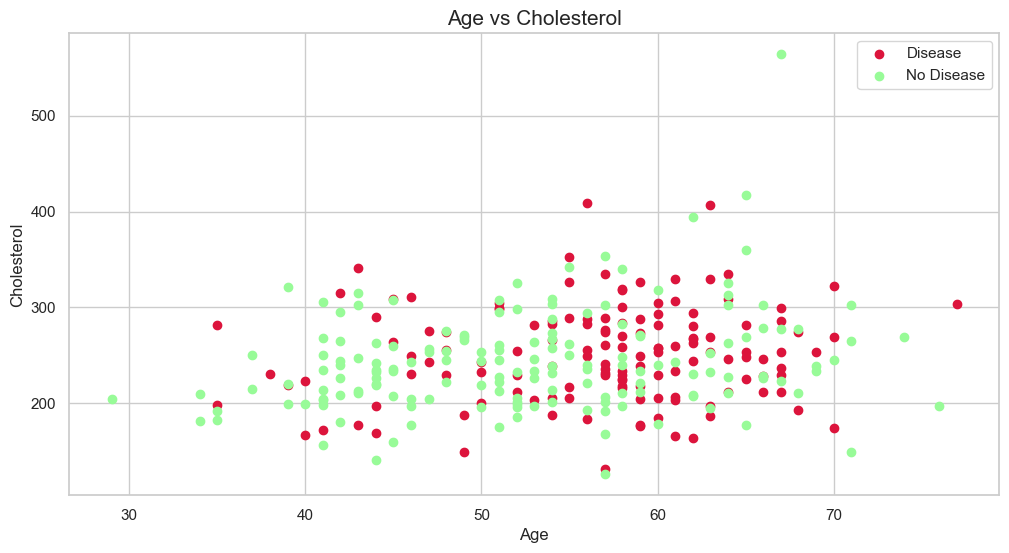

In [95]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,6))

plt.scatter(data.age[data.condition=='Yes'], data.cholesterol[data.condition=='Yes'],color='crimson')
plt.scatter(data.age[data.condition=='No'], data.cholesterol[data.condition=='No'],color='palegreen')

plt.title('Age vs Cholesterol',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Cholesterol',fontsize=12)
plt.legend(['Disease','No Disease'])

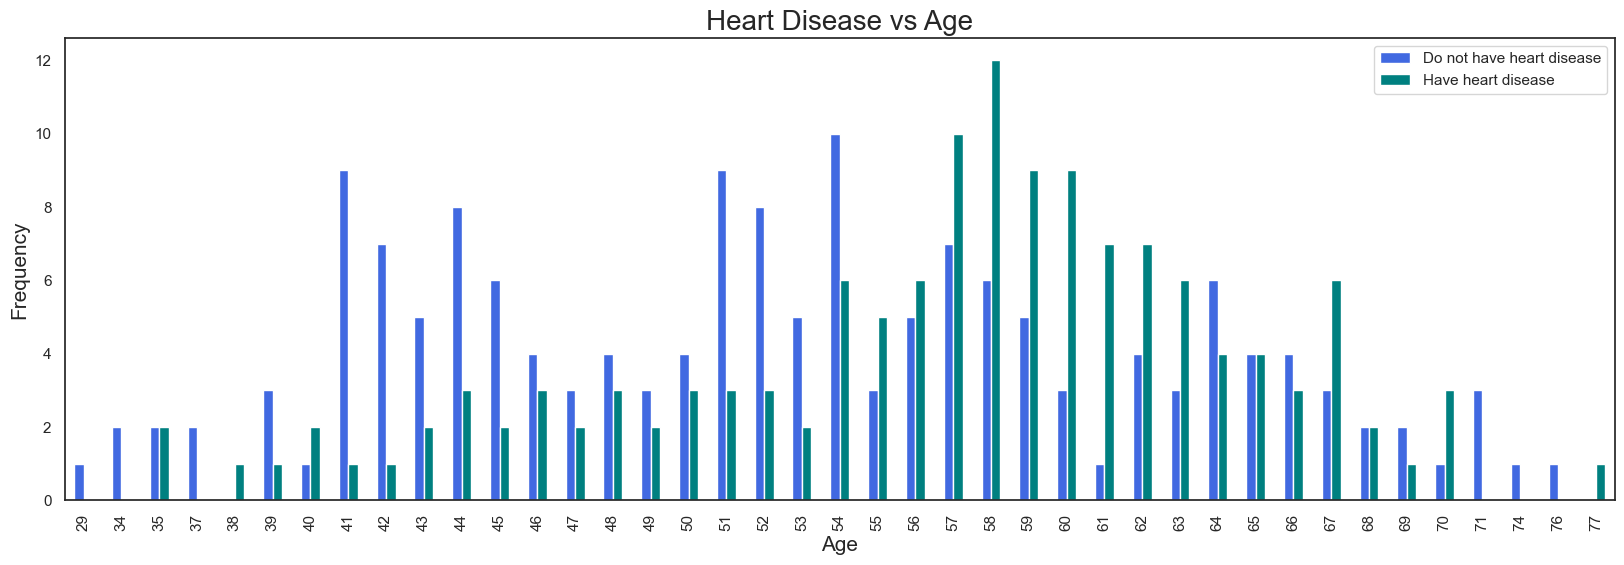

In [96]:
sns.set(style="white")
pd.crosstab(data.age, data.condition).plot(kind="bar", figsize=(20, 6), ax=plt.gca(), color=['royalblue', 'teal'])
plt.title("Heart Disease vs Age",fontsize=20)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

As the patient's age increases, probability of having heart disease also increases.

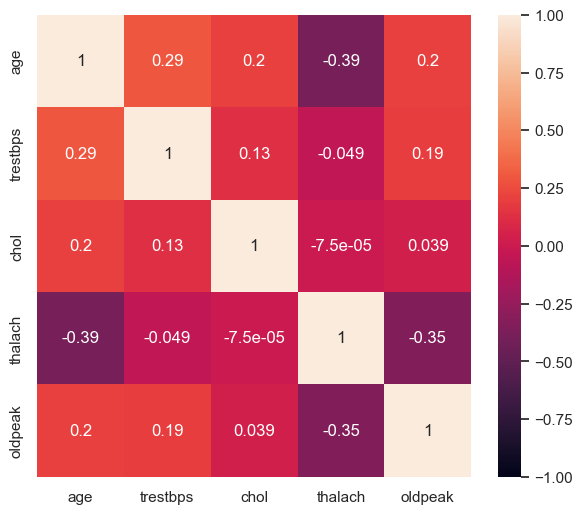

In [104]:
corr = df[['age','trestbps','chol','thalach','oldpeak']].corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, vmin=-1.0)
plt.show()

From the correlation heatmap and other charts, we observe following things:

-higher age -> more likely heart disease

-higher blood sugar -> more likely heart disease

-higher cholesterol -> more likely heart disease

-lower maximum achieved heart rate -> more likely heart disease

<h3>Processing of outliers</h3>

In [105]:
df = df.apply(lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99)))

Creating Dummy Variables using OHE

In [106]:
cp_dummy = pd.get_dummies(df["cp"], prefix="cp",drop_first=True)
thal_dummy  = pd.get_dummies(df["thal"], prefix="thal",drop_first=True)
slope_dummy  = pd.get_dummies(df["slope"], prefix="slope",drop_first=True)
ca_dummy  = pd.get_dummies(df["ca"], prefix="ca",drop_first=True)
rescg_dummy  = pd.get_dummies(df["restecg"], prefix="restecg",drop_first=True)

In [107]:
frames = [df, cp_dummy, thal_dummy, slope_dummy, ca_dummy, rescg_dummy]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_3,thal_1,thal_2,slope_1,slope_2,ca_1,ca_2,ca_3,restecg_1,restecg_2
0,69.0,1,0,160.0,234.0,1,2,131.0,0,0.1,...,0,0,0,1,0,1,0,0,0,1
1,69.0,0,0,140.0,239.0,0,0,151.0,0,1.8,...,0,0,0,0,0,0,1,0,0,0
2,66.0,0,0,150.0,226.0,0,0,114.0,0,2.6,...,0,0,0,0,1,0,0,0,0,0
3,65.0,1,0,138.0,282.0,1,2,174.0,0,1.4,...,0,0,0,1,0,1,0,0,0,1
4,64.0,1,0,110.0,211.0,0,2,144.0,1,1.8,...,0,0,0,1,0,0,0,0,0,1


In [108]:
df = df.drop(columns=["cp", "thal", "slope","ca","restecg"])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,condition,cp_1,...,cp_3,thal_1,thal_2,slope_1,slope_2,ca_1,ca_2,ca_3,restecg_1,restecg_2
0,69.0,1,160.0,234.0,1,131.0,0,0.1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,69.0,0,140.0,239.0,0,151.0,0,1.8,0,0,...,0,0,0,0,0,0,1,0,0,0
2,66.0,0,150.0,226.0,0,114.0,0,2.6,0,0,...,0,0,0,0,1,0,0,0,0,0
3,65.0,1,138.0,282.0,1,174.0,0,1.4,1,0,...,0,0,0,1,0,1,0,0,0,1
4,64.0,1,110.0,211.0,0,144.0,1,1.8,0,0,...,0,0,0,1,0,0,0,0,0,1


<h3>Scaling the data</h3>

In [110]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

<h3>Feature Selection</h3>

In [112]:
X = df[df.columns.difference(['condition'])]
SKB = SelectKBest(f_classif, k=15).fit(X, np.ravel(df[['condition']]))

In [113]:
imp_vars_SKB = list(X.columns[SKB.get_support()])
imp_vars_SKB

['age',
 'ca_1',
 'ca_2',
 'ca_3',
 'cp_1',
 'cp_2',
 'cp_3',
 'exang',
 'oldpeak',
 'restecg_2',
 'sex',
 'slope_1',
 'thal_2',
 'thalach',
 'trestbps']

In [114]:
x = df[imp_vars_SKB]
y = df.condition.values

In [120]:
preprocessed_data = x.copy()
preprocessed_data['condition'] = y
preprocessed_data.head()

,age,ca_1,ca_2,ca_3,cp_1,cp_2,cp_3,exang,oldpeak,restecg_2,sex,slope_1,thal_2,thalach,trestbps,condition
0,1.631828,1,0,0,0,0,0,0,-0.840818,1,1,1,0,-0.830966,1.639783,0
1,1.631828,0,1,0,0,0,0,0,0.674145,0,0,0,0,0.059252,0.483937,0
2,1.293679,0,0,0,0,0,0,0,1.387069,0,0,0,0,-1.587651,1.061860,0
3,1.180963,1,0,0,0,0,0,0,0.317683,1,1,1,0,1.083002,0.368353,1
4,1.068247,0,0,0,0,0,0,1,0.674145,1,1,1,0,-0.252324,-1.249831,0


<h3>Save preprocessed dataset to csv</h3>

In [121]:
preprocessed_data.to_csv('../data/preprocessed/heart_cleveland_upload_preprocessed.csv')

<h3>Splitting the data into training and testing</h3>
and save to csv

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1)

In [124]:
print('X_train-', x_train.size)
print('X_test-',x_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 3555
X_test- 900
y_train- 237
y_test- 60


In [126]:
pd.DataFrame(x_train).to_csv('../data/preprocessed/X_train.csv')
pd.DataFrame(x_test).to_csv('../data/preprocessed/X_test.csv')
pd.DataFrame(y_train).to_csv('../data/preprocessed/Y_train.csv')
pd.DataFrame(y_test).to_csv('../data/preprocessed/Y_test.csv')